In [42]:
%pip install seaborn
%pip install pandas
%pip install pandas mysql-connector-python SQLAlchemy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\vashi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\vashi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\vashi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
cols=['rowid','orderid','orderdate','shipdate','shipmode','custid','custname','segment','country','city','state','postalcode','region','productid','category','subcategory','productname','sales','quantity','discount','profit']
df=pd.read_csv("superstore.csv",names=cols, encoding='windows-1252')

In [6]:
df.head(5)

,rowid,orderid,orderdate,shipdate,shipmode,custid,custname,segment,country,city,...,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit
0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
2,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0,219.582
3,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,6.8714
4,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031


In [7]:
df = df.drop(0) 

In [8]:
df.head(5)

,rowid,orderid,orderdate,shipdate,shipmode,custid,custname,segment,country,city,...,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit
1,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
2,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0,219.582
3,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,6.8714
4,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031
5,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [9]:
df.isnull().sum()

rowid          0
orderid        0
orderdate      0
shipdate       0
shipmode       0
custid         0
custname       0
segment        0
country        0
city           0
state          0
postalcode     0
region         0
productid      0
category       0
subcategory    0
productname    0
sales          0
quantity       0
discount       0
profit         0
dtype: int64

In [10]:
df.columns=cols

In [11]:
for col in df.select_dtypes(include='object').columns:
  df[col]=df[col].str.strip()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 1 to 9994
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rowid        9994 non-null   object
 1   orderid      9994 non-null   object
 2   orderdate    9994 non-null   object
 3   shipdate     9994 non-null   object
 4   shipmode     9994 non-null   object
 5   custid       9994 non-null   object
 6   custname     9994 non-null   object
 7   segment      9994 non-null   object
 8   country      9994 non-null   object
 9   city         9994 non-null   object
 10  state        9994 non-null   object
 11  postalcode   9994 non-null   object
 12  region       9994 non-null   object
 13  productid    9994 non-null   object
 14  category     9994 non-null   object
 15  subcategory  9994 non-null   object
 16  productname  9994 non-null   object
 17  sales        9994 non-null   object
 18  quantity     9994 non-null   object
 19  discount     9994 non-null 

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,rowid,orderid,orderdate,shipdate,shipmode,custid,custname,segment,country,city,...,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,5009,1237,1334,4,793,793,3,1,531,...,631,4,1862,3,17,1850,5825,14,12,7287
top,9994,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,12.96,3,0,0
freq,1,14,38,35,5968,37,37,5191,9994,915,...,263,3203,19,6026,1523,48,56,2409,4798,65


In [17]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['shipdate'] = pd.to_datetime(df['shipdate'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 1 to 9994
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rowid        9994 non-null   object        
 1   orderid      9994 non-null   object        
 2   orderdate    9994 non-null   datetime64[ns]
 3   shipdate     9994 non-null   datetime64[ns]
 4   shipmode     9994 non-null   object        
 5   custid       9994 non-null   object        
 6   custname     9994 non-null   object        
 7   segment      9994 non-null   object        
 8   country      9994 non-null   object        
 9   city         9994 non-null   object        
 10  state        9994 non-null   object        
 11  postalcode   9994 non-null   object        
 12  region       9994 non-null   object        
 13  productid    9994 non-null   object        
 14  category     9994 non-null   object        
 15  subcategory  9994 non-null   object        
 16  produc

In [21]:
df['rowid'] = df['rowid'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 1 to 9994
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rowid        9994 non-null   int64         
 1   orderid      9994 non-null   object        
 2   orderdate    9994 non-null   datetime64[ns]
 3   shipdate     9994 non-null   datetime64[ns]
 4   shipmode     9994 non-null   object        
 5   custid       9994 non-null   object        
 6   custname     9994 non-null   object        
 7   segment      9994 non-null   object        
 8   country      9994 non-null   object        
 9   city         9994 non-null   object        
 10  state        9994 non-null   object        
 11  postalcode   9994 non-null   object        
 12  region       9994 non-null   object        
 13  productid    9994 non-null   object        
 14  category     9994 non-null   object        
 15  subcategory  9994 non-null   object        
 16  produc

In [23]:
df['postalcode'] = df['postalcode'].astype(int)

In [25]:
df['sales'] = df['sales'].astype(float)

In [26]:
df['quantity'] = df['quantity'].astype(int)

In [27]:
df['discount'] = df['discount'].astype(float)

In [28]:
df['profit'] = df['profit'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 1 to 9994
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rowid        9994 non-null   int64         
 1   orderid      9994 non-null   object        
 2   orderdate    9994 non-null   datetime64[ns]
 3   shipdate     9994 non-null   datetime64[ns]
 4   shipmode     9994 non-null   object        
 5   custid       9994 non-null   object        
 6   custname     9994 non-null   object        
 7   segment      9994 non-null   object        
 8   country      9994 non-null   object        
 9   city         9994 non-null   object        
 10  state        9994 non-null   object        
 11  postalcode   9994 non-null   int64         
 12  region       9994 non-null   object        
 13  productid    9994 non-null   object        
 14  category     9994 non-null   object        
 15  subcategory  9994 non-null   object        
 16  produc

In [37]:
#1.sales and profit overview

Total Sales: $2,297,200.86
Total Profit: $286,397.02


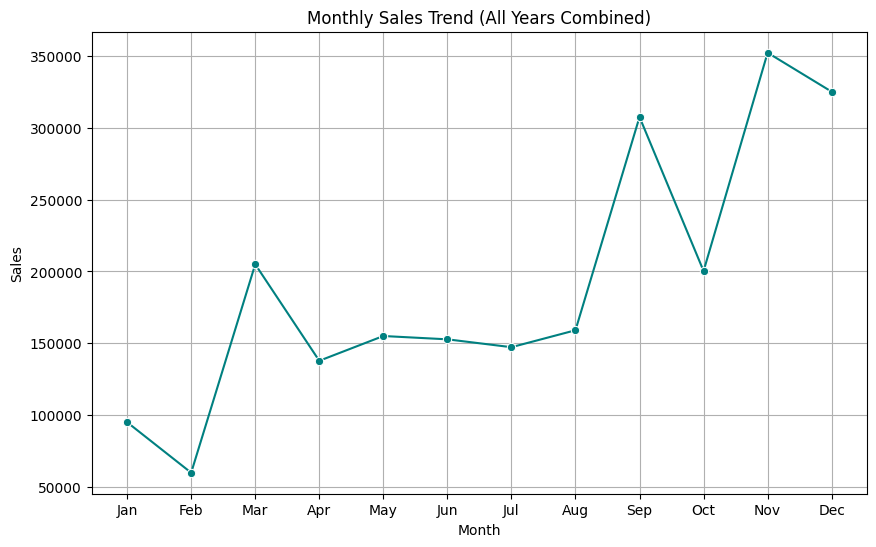

In [35]:
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')
df['month'] = df['orderdate'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = df.groupby('month')['sales'].sum().reindex(month_order)

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title('Monthly Sales Trend (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

C:\Users\vashi\AppData\Local\Temp\ipykernel_8376\1215236379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_d')


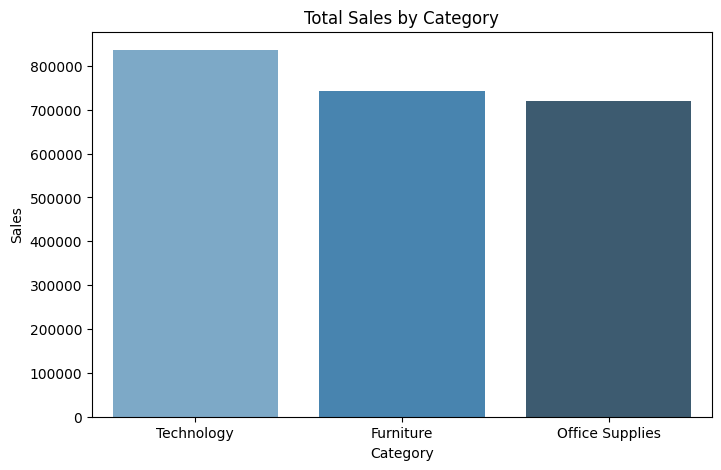

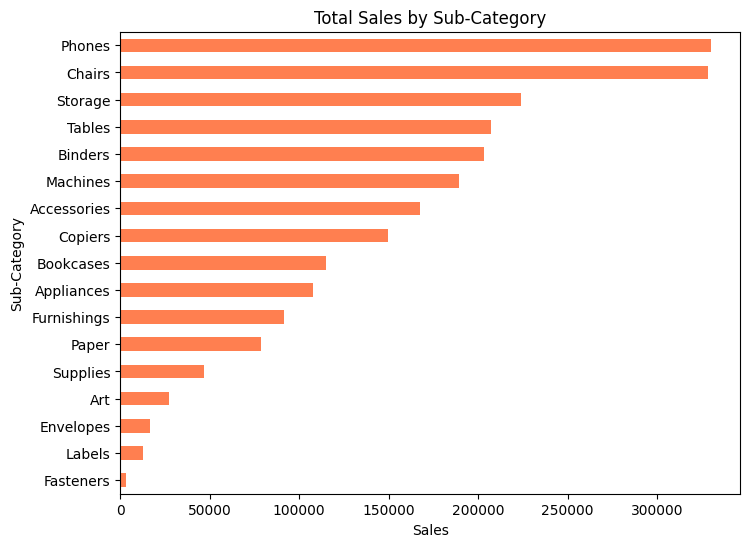

In [38]:
#2.sales by category and sub category
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Blues_d')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

subcategory_sales = df.groupby('subcategory')['sales'].sum().sort_values()

plt.figure(figsize=(8,6))
subcategory_sales.plot(kind='barh', color='coral')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()


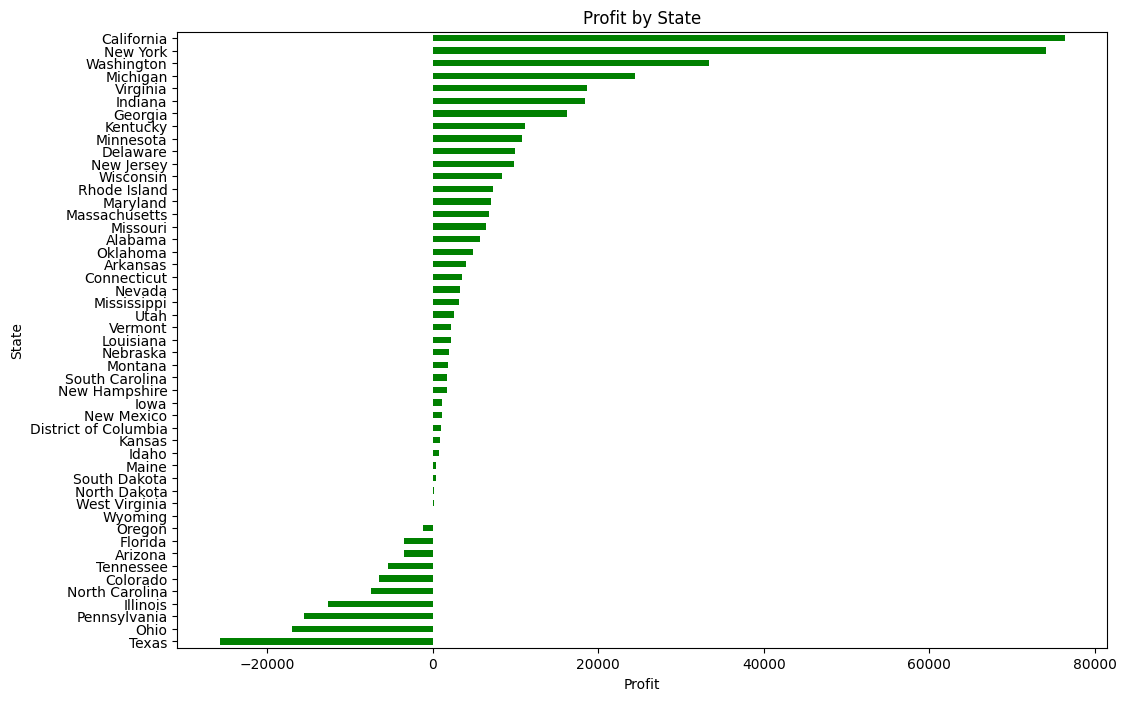

In [39]:
#3.profit by state
state_profit = df.groupby('state')['profit'].sum().sort_values()

plt.figure(figsize=(12,8))
state_profit.plot(kind='barh', color='green')
plt.title('Profit by State')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

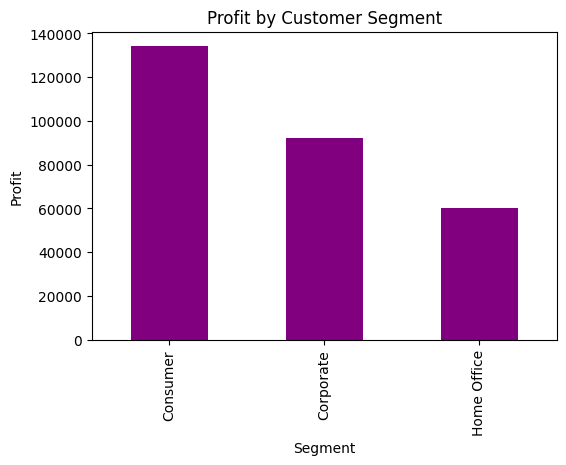

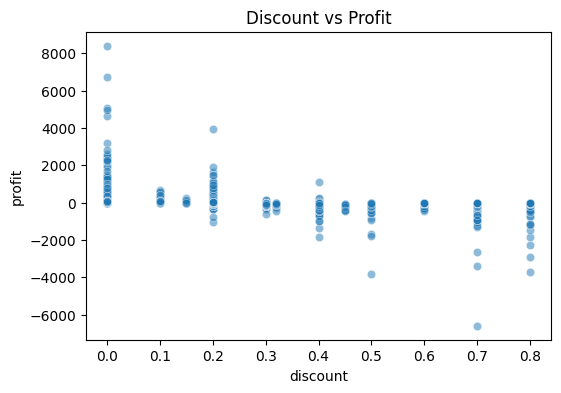

In [41]:
#4.customer segmentation and discount impact
segment_profit = df.groupby('segment')['profit'].sum()

plt.figure(figsize=(6,4))
segment_profit.plot(kind='bar', color='purple')
plt.title('Profit by Customer Segment')
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title('Discount vs Profit')
plt.show()

In [44]:
from sqlalchemy import create_engine

In [45]:
username = 'root'
password = 'root'
host = 'localhost'       # or your MySQL server IP
port = 3306              # default MySQL port
database = 'superstore'

engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

In [46]:
df.to_sql(name='store', con=engine, if_exists='replace', index=False)

-1